# Imports

In [805]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import gcd

# Reading Dataset

In [806]:
df = pd.read_csv("/Users/gt/Desktop/IIITB/loan_upgrad.csv", low_memory=False)

In [807]:
pd.options.mode.chained_assignment = None

# Understanding dataset

In [808]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [809]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


<b> Here, the dataset contains large amount of columns, where many of them are not usefull to us. So let select the columns which will be usefull to us.</b>

In [810]:
data = df[['annual_inc', 'verification_status', 'emp_length', 'home_ownership', 'grade', 'sub_grade', 'loan_amnt', 'installment', 'int_rate', 'loan_status']]


In [811]:
data.head()

,annual_inc,verification_status,emp_length,home_ownership,grade,sub_grade,loan_amnt,installment,int_rate,loan_status
0,24000.0,Verified,10+ years,RENT,B,B2,5000,162.87,10.65%,Fully Paid
1,30000.0,Source Verified,< 1 year,RENT,C,C4,2500,59.83,15.27%,Charged Off
2,12252.0,Not Verified,10+ years,RENT,C,C5,2400,84.33,15.96%,Fully Paid
3,49200.0,Source Verified,10+ years,RENT,C,C1,10000,339.31,13.49%,Fully Paid
4,80000.0,Source Verified,1 year,RENT,B,B5,3000,67.79,12.69%,Current


In [812]:
data.shape

(39717, 10)

### Understanding Columns


#### Columns description
<b>auunal_inc</b> = It contains the annual income of the customer.<br><br>
<b>verification_status</b> = It contains the info regarding if the sourse <br>of income of customer was verified or not.<br><br>
<b>emp_length</b> = It contains the info about the years a customer is working.<br><br>
<b>home_ownership</b> = It contains the info about the home ownership, like if the cusomer owns the house or live in rent, etc.<br><br>
<b>grade</b> = It contains the info about the LC assigned grade.<br><br>
<b>sub_grade</b> = It contains the info about the LC assigned sub-grade.<br><br>
<b>loan_amnt</b> = How much the loan was alloted.<br><br>
<b>installment</b> = How much the installment was.<br><br>
<b>int_rate</b> = At what interest rate was the loan given.<br><br>
<b>loan_status</b> = Status of loan, if the loan was paid or not.<br><br>

#### Column types
<b>Categorical</b><br>
<ul>
    <li>verification_status</li>
    <li>emp_length</li>
    <li>home_ownership</li>
    <li>grade</li>
    <li>sub_grade</li>
    <li>loan_status</li>
</ul>
<br><br>
<b>Quantative</b>
<ul>
    <li>annual_inc</li>
    <li>loan_amnt</li>
    <li>installment</li>
    <li>int_rate</li>
</ul>


# Cleaning data

In [813]:
data.dtypes

annual_inc             float64
verification_status     object
emp_length              object
home_ownership          object
grade                   object
sub_grade               object
loan_amnt                int64
installment            float64
int_rate                object
loan_status             object
dtype: object

<b>Here we need to change the data type of int_rate as the interest rate in a quantative variable</b>

In [814]:
data.int_rate = data.int_rate.apply(lambda x: float(x.split('%')[0]))

In [815]:
data.dtypes

annual_inc             float64
verification_status     object
emp_length              object
home_ownership          object
grade                   object
sub_grade               object
loan_amnt                int64
installment            float64
int_rate               float64
loan_status             object
dtype: object

<b>Lets check for the null values</b>

In [816]:
data.isnull().sum()

annual_inc                0
verification_status       0
emp_length             1075
home_ownership            0
grade                     0
sub_grade                 0
loan_amnt                 0
installment               0
int_rate                  0
loan_status               0
dtype: int64

<b>Here we have one column which has null values, emp_length<b/>

<b>Check which value is most common in the list</b>

In [817]:
data.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [818]:
len(data.emp_length.unique())

12

<b>The most common value id 10+ years, So we will the the same to all null records.</b>

In [819]:
data.emp_length = data.emp_length.fillna('10+ years')

In [820]:
data.isnull().sum()

annual_inc             0
verification_status    0
emp_length             0
home_ownership         0
grade                  0
sub_grade              0
loan_amnt              0
installment            0
int_rate               0
loan_status            0
dtype: int64

<b>Lets check the verification_status columns</b>

In [821]:

data.verification_status.value_counts()

Not Verified       16921
Verified           12809
Source Verified     9987
Name: verification_status, dtype: int64

<b>Here we can see the the there are three status, where two of them, <i>"Verified"</i> and <i>"Source Verified"</i> are the same values. So we can change the <i>"Source verified"</i> to <i>"Verified"</i></b>

In [822]:
data.verification_status = data.verification_status.apply(lambda x: "Verified" if x == "Source Verified" else x)

In [823]:
data.verification_status.unique()

array(['Verified', 'Not Verified'], dtype=object)

<b>Lets check the Home Ownership column</b>

In [824]:
data.home_ownership.value_counts()

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

<b>Now, here we can see that we still have some null values here but not in the form of np.null or some other object, but it's in the form of direct text. So we will the all the null values to the most common occuring value which is "Rent".</b>

In [825]:
data.home_ownership = data.home_ownership.apply(lambda x: "RENT" if x == "NONE" else x)

In [826]:
data.home_ownership.value_counts()

RENT        18902
MORTGAGE    17659
OWN          3058
OTHER          98
Name: home_ownership, dtype: int64

# Filtering data

In [827]:
data.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

<b>Here we can see that we have three type of loan status here, <i>"Fully Pain", "Charged Off", "Current"</i></b><br><br>
<b>We do not need the Current customers data, we just need to study the Charged of and Fully Paid</b>

In [828]:
data = data[~(data.loan_status == "Current")]

In [829]:
data.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

# Derived Metrics

In [830]:
print(f"Max value = {data.annual_inc.max()}")
print(f"Min value = {data.annual_inc.min()}")

Max value = 6000000.0
Min value = 4000.0


<b>Here we can see the values starts from 4,000 and the max is 60,00,000. The values are very high and also we need to compare the income with the installments and all, so we will need the values as per monthy income.</b>

In [831]:
data['monthly_inc'] = data.annual_inc/12

In [832]:
data.head()

,annual_inc,verification_status,emp_length,home_ownership,grade,sub_grade,loan_amnt,installment,int_rate,loan_status,monthly_inc
0,24000.0,Verified,10+ years,RENT,B,B2,5000,162.87,10.65,Fully Paid,2000.0
1,30000.0,Verified,< 1 year,RENT,C,C4,2500,59.83,15.27,Charged Off,2500.0
2,12252.0,Not Verified,10+ years,RENT,C,C5,2400,84.33,15.96,Fully Paid,1021.0
3,49200.0,Verified,10+ years,RENT,C,C1,10000,339.31,13.49,Fully Paid,4100.0
5,36000.0,Verified,3 years,RENT,A,A4,5000,156.46,7.90,Fully Paid,3000.0


<b>Now we have a new column "monthly_inc" which contains the monthly income of the customer.</b>

# Univariate Analysis

## Checking for the outlires in quantative variables

### Monthly Income

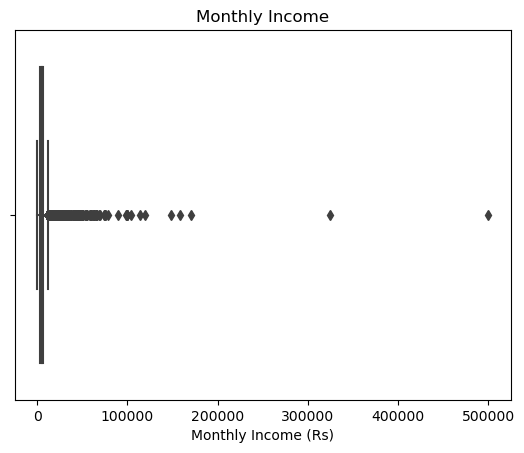

In [833]:
sns.boxplot(data=data, x="monthly_inc")
plt.title("Monthly Income")
plt.xlabel("Monthly Income (Rs)")
plt.show()

In [834]:
data.monthly_inc.describe()

count     38577.000000
mean       5731.497807
std        5351.556817
min         333.333333
25%        3333.333333
50%        4905.666667
75%        6833.333333
max      500000.000000
Name: monthly_inc, dtype: float64

<b>Here we can clearly spot the outlires. The 75th quantile of the data is 6833 which is far very less to analise, so we will just remove few records first.</b><br>
<b>So lets first remove the monthly income above 1 Lack.</b>

In [835]:
data = data[data.monthly_inc <= 100000]

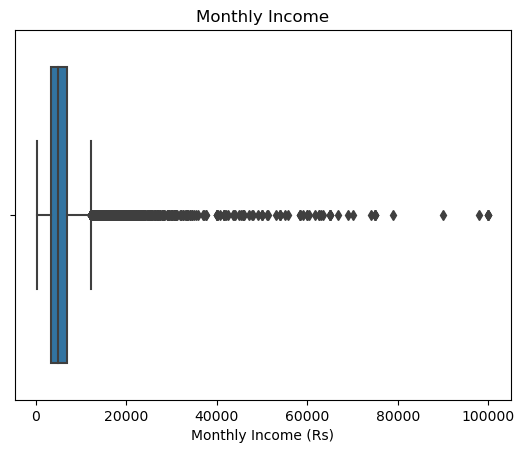

In [836]:
sns.boxplot(data=data, x="monthly_inc")
plt.title("Monthly Income")
plt.xlabel("Monthly Income (Rs)")
plt.show()

In [837]:
data.monthly_inc.describe()

count     38569.000000
mean       5690.178871
std        4116.243726
min         333.333333
25%        3333.333333
50%        4900.000000
75%        6833.333333
max      100000.000000
Name: monthly_inc, dtype: float64

<b>We still have a good amount of outlires left.</b><br><br>
<b>Lets remove more of it. Lets try with 10,000, as most of the lones are taken by the people earning less then 10,000</b>

In [838]:
data = data[data.monthly_inc <= 10000]

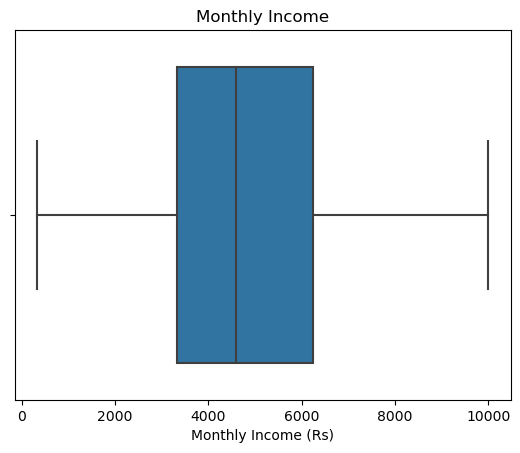

In [839]:
sns.boxplot(data=data, x="monthly_inc")
plt.title("Monthly Income")
plt.xlabel("Monthly Income (Rs)")
plt.show()

In [840]:
data.monthly_inc.describe()

count    35424.000000
mean      4869.715149
std       2077.036249
min        333.333333
25%       3333.333333
50%       4583.333333
75%       6250.000000
max      10000.000000
Name: monthly_inc, dtype: float64

<b>So, the 10,000 amount was enough.</b>

### Loan amount

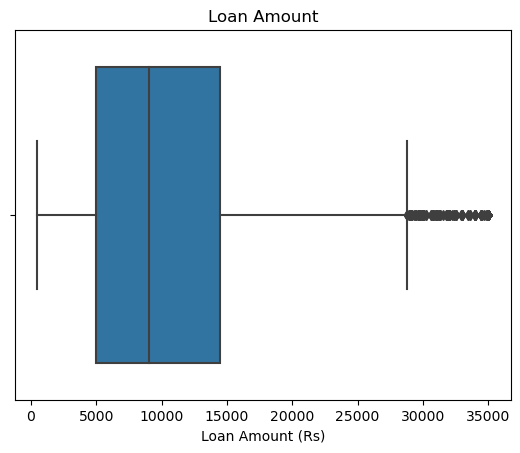

In [841]:
sns.boxplot(data=data, x="loan_amnt")
plt.title("Loan Amount")
plt.xlabel("Loan Amount (Rs)")
plt.show()

In [842]:
data.loan_amnt.describe()

count    35424.000000
mean     10495.560919
std       6908.104738
min        500.000000
25%       5000.000000
50%       9000.000000
75%      14500.000000
max      35000.000000
Name: loan_amnt, dtype: float64

<b>I think that we dont need to change anything in loan amount as 30k to 30k or more till 50k lones are common.</b>

### Installment

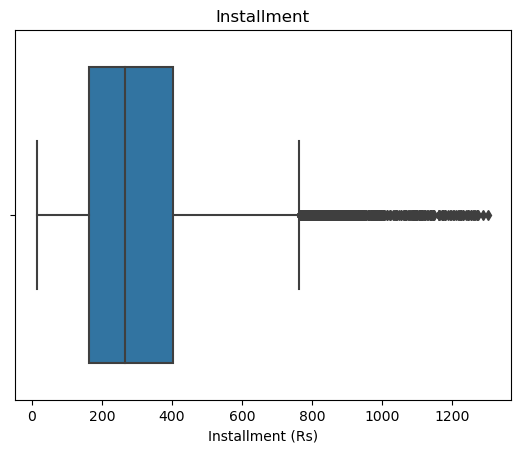

In [843]:
sns.boxplot(data=data, x="installment")
plt.title("Installment")
plt.xlabel("Installment (Rs)")
plt.show()

In [844]:
data.installment.describe()

count    35424.000000
mean       306.593443
std        194.887862
min         15.690000
25%        161.760000
50%        265.680000
75%        402.540000
max       1302.690000
Name: installment, dtype: float64

<b>I think that we dont need to change anything in installment as 1000 to 1500 does not make any major difference.</b>

### Interest rate

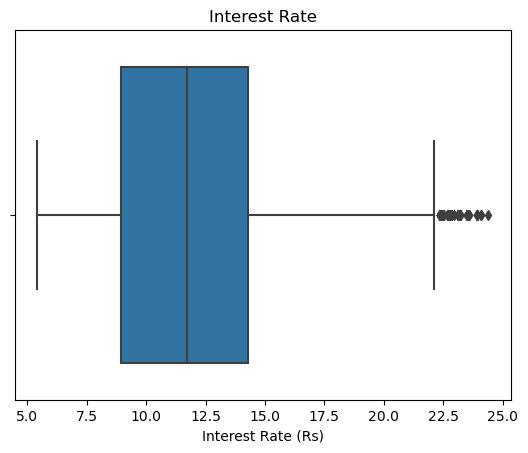

In [845]:
sns.boxplot(data=data, x="int_rate")
plt.title("Interest Rate")
plt.xlabel("Interest Rate (Rs)")
plt.show()

In [846]:
data.int_rate.describe()

count    35424.000000
mean        11.867994
std          3.652712
min          5.420000
25%          8.940000
50%         11.710000
75%         14.270000
max         24.400000
Name: int_rate, dtype: float64

<b>Here the interest rate from 14% to 24% makes a large difference as more then 15% is a very high interest to pay.</b><br>
<b>So, We will remove the values for the interest rate above 15%</b>


In [847]:
data = data[data.int_rate <= 15]

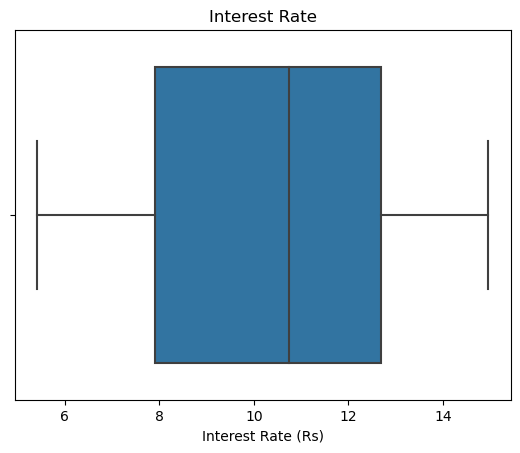

In [848]:
sns.boxplot(data=data, x="int_rate")
plt.title("Interest Rate")
plt.xlabel("Interest Rate (Rs)")
plt.show()

In [849]:
data.int_rate.describe()

count    28299.000000
mean        10.529025
std          2.647982
min          5.420000
25%          7.900000
50%         10.750000
75%         12.690000
max         14.960000
Name: int_rate, dtype: float64

## Checking the count of categorical variables

### Verification Status

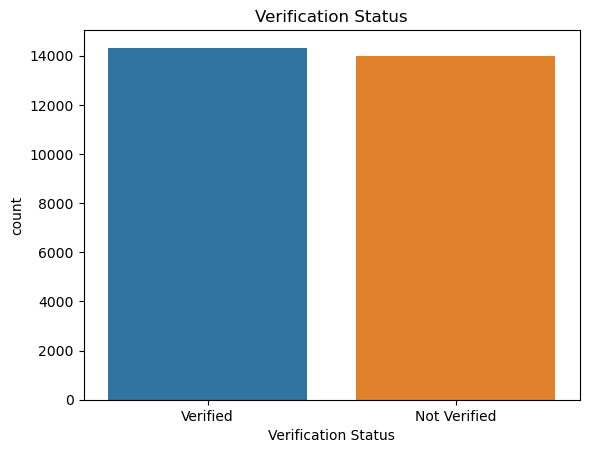

In [850]:
sns.countplot(data=data, x="verification_status")
plt.title("Verification Status")
plt.xlabel("Verification Status")
plt.show()

<b>There is not much difference in the count of "Verified" and "Non Verified" customers.</b>

### Employ Length

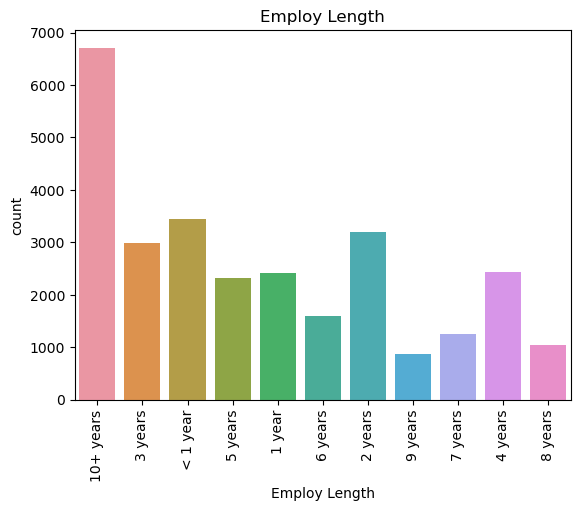

In [851]:
sns.countplot(data=data, x="emp_length")
plt.title("Employ Length")
plt.xlabel("Employ Length")
plt.xticks(rotation=90)
plt.show()

<b>Most of the loan is already given to the customers with 10+ years experience.</b>

### Home Ownership

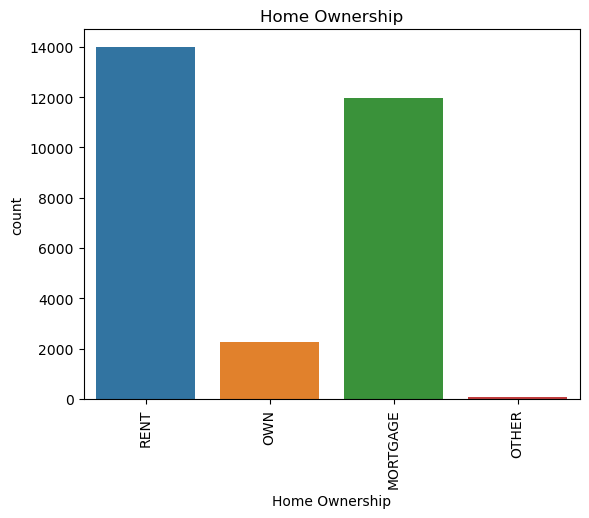

In [852]:
sns.countplot(data=data, x="home_ownership")
plt.title("Home Ownership")
plt.xlabel("Home Ownership")
plt.xticks(rotation=90)
plt.show()

<b>It was very clear that, most of the loan takers are living on rent or had mortgaged their home.</b>

### LC assigned Grades

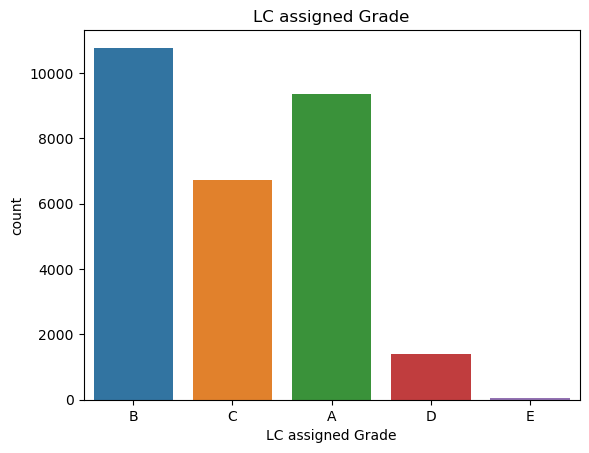

In [853]:
sns.countplot(data=data, x="grade")
plt.title("LC assigned Grade")
plt.xlabel("LC assigned Grade")
plt.show()

<b>As per the LC grades, most of the loan takers stands in grade A and B which is why the amount of Fully paid customers are more then the Charged Off.</b>

### Loan Status

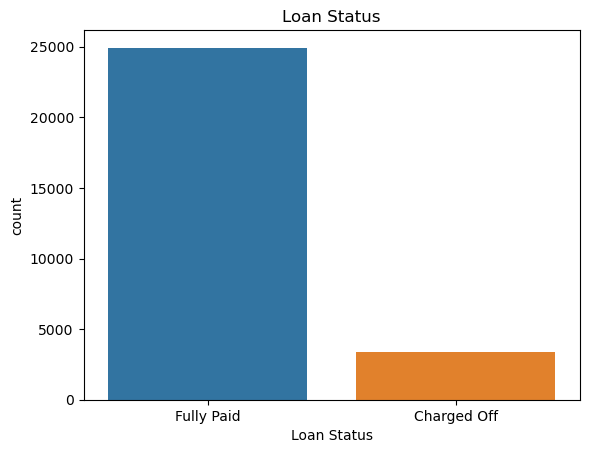

In [854]:
sns.countplot(data=data, x="loan_status")
plt.title("Loan Status")
plt.xlabel("Loan Status")
plt.show()

<b>Most of the them has fully paid as mostly the loan was given to the grade 'A' and 'B' customers.</b>

In [855]:
'''
fig, ax = plt.subplots(3, 2, figsize=(20, 20))

sns.countplot(ax=ax[0,0], data=data, x="verification_status")
sns.countplot(ax=ax[0,1], data=data, x="emp_length")
sns.countplot(ax=ax[1,0], data=data, x="home_ownership")
sns.countplot(ax=ax[1,1], data=data, x="grade")
sns.countplot(ax=ax[2,0], data=data, x="sub_grade")
sns.countplot(ax=ax[2,1], data=data, x="loan_status")
plt.xticks(rotation=90)
plt.show()
'''

'\nfig, ax = plt.subplots(3, 2, figsize=(20, 20))\n\nsns.countplot(ax=ax[0,0], data=data, x="verification_status")\nsns.countplot(ax=ax[0,1], data=data, x="emp_length")\nsns.countplot(ax=ax[1,0], data=data, x="home_ownership")\nsns.countplot(ax=ax[1,1], data=data, x="grade")\nsns.countplot(ax=ax[2,0], data=data, x="sub_grade")\nsns.countplot(ax=ax[2,1], data=data, x="loan_status")\nplt.xticks(rotation=90)\nplt.show()\n'

## Observations from univariate analysis

1. Most of the Loans were given to the customers who has 10* years of working period.
2. Most of the Loan takers were living in rent or had mortgaged their homes.
3. Most of the Loans were given to the grade 'A' and 'B' customers.
4. 75% quantile Monthly income of customers is around 7,000rs.
5. 75% quantile Loan amount of customers is around 14,500rs.
6. 75% quantile Installment of customers is around 400rs.
6. 75% quantile Interest Rate of customers is around 15%.

# Bivariate Analysis

### Some required functions

In [856]:
ver_sta_uni = data.verification_status.unique()
loa_sta_uni = data.loan_status.unique()
emp_uni = data.emp_length.unique()
gra_uni = data.grade.unique()
hom_own_uni = data.home_ownership.unique()

In [870]:
def ratio(x, y):
    d = gcd(x, y)
    
    x = x // d
    y = y // d
    
    return [x, y]


def ratio_per(pvt, index, column, hue):
    ratio_arr = {}
    temp=[]
    ratio_final = {}

    for i in index:
        for j in hue:
            temp.append(pvt.loc[(i), (column, j)])
        ratio_arr[i] = ratio(temp[0], temp[1])
        temp = []

    for i in ratio_arr:
        ratio_final[i] = round((ratio_arr[i][1]*100)/(ratio_arr[i][1]+ratio_arr[i][0]), 2)
    
    return ratio_final
    #pt.loc[('Verified'), ('monthly_inc', 'Charged Off')]

## Count of loan status as per other categorial veriables with respect to Loan Status

### Verification Status

In [858]:
pt = pd.pivot_table(data=data[['monthly_inc', 'verification_status', 'loan_status']], index='verification_status', columns='loan_status', aggfunc='count')


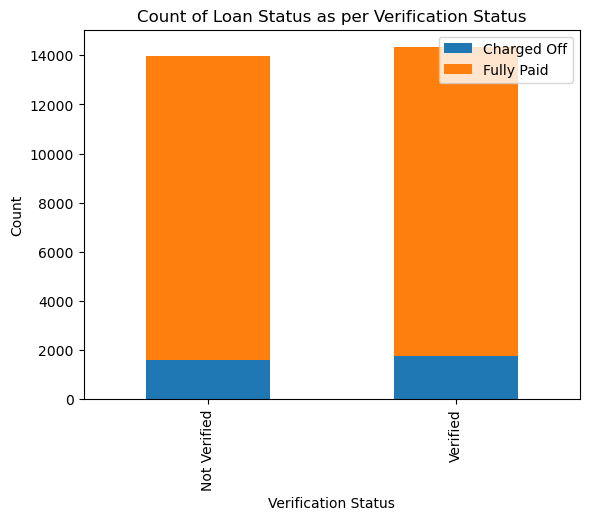

In [859]:
pt.plot(kind='bar', stacked=True)
plt.ylabel("Count")
plt.xlabel("Verification Status")
plt.legend(['Charged Off', 'Fully Paid'])
plt.title("Count of Loan Status as per Verification Status")
plt.show()

In [860]:
temp = ratio_per(pt, ver_sta_uni, 'monthly_inc', loa_sta_uni)

for i in temp:
    print(i)
    print(f"Charged Off : {temp[i]}%, Fully Paid : {100-temp[i]}%")
    print()

Verified
Charged Off : 12.35%, Fully Paid : 87.65%

Not Verified
Charged Off : 11.44%, Fully Paid : 88.56%



<b>Here we can see that, around 12.35% customers who were "verified" had Charged Off and 87.65% customers are Fully Paid</b><br><br>
<b>Here we can see that, around 11.44% customers who were "non verified" had Charged Off and 88.65% customers are Fully Paid</b>

### Employ Length

In [861]:
pt2 = pd.pivot_table(data=data[['monthly_inc', 'emp_length', 'loan_status']], index='emp_length', columns='loan_status', aggfunc='count')


Text(0.5, 1.0, 'Count of Loan Status as per Employ Length')

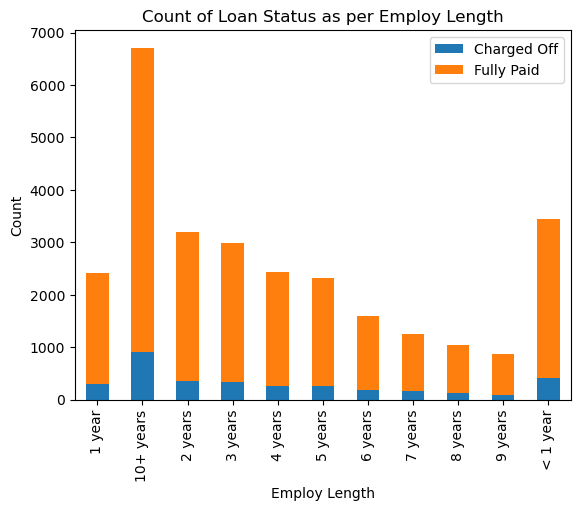

In [862]:
pt2.plot(kind='bar', stacked=True)
plt.ylabel("Count")
plt.xlabel("Employ Length")
plt.legend(['Charged Off', 'Fully Paid'])
plt.title("Count of Loan Status as per Employ Length")

In [863]:
temp = ratio_per(pt2, emp_uni, 'monthly_inc', loa_sta_uni)

for i in temp:
    print(i)
    print(f"Charged Off : {temp[i]}%, Fully Paid : {100-temp[i]}%")
    print()

10+ years
Charged Off : 13.55%, Fully Paid : 86.45%

3 years
Charged Off : 11.06%, Fully Paid : 88.94%

< 1 year
Charged Off : 12.15%, Fully Paid : 87.85%

5 years
Charged Off : 11.34%, Fully Paid : 88.66%

1 year
Charged Off : 12.27%, Fully Paid : 87.73%

6 years
Charged Off : 11.06%, Fully Paid : 88.94%

2 years
Charged Off : 10.84%, Fully Paid : 89.16%

9 years
Charged Off : 9.92%, Fully Paid : 90.08%

7 years
Charged Off : 12.44%, Fully Paid : 87.56%

4 years
Charged Off : 10.78%, Fully Paid : 89.22%

8 years
Charged Off : 11.44%, Fully Paid : 88.56%



<b>Here we can see that, around 12.15% customers who were "< 1 Year" had Charged Off</b><br><br>
<b>Here we can see that, around 12.27% customers who were "1 Year" had Charged Off</b>

### Grade

In [864]:
pt3 = pd.pivot_table(data=data[['monthly_inc', 'grade', 'loan_status']], index='grade', columns='loan_status', aggfunc='count')


Text(0.5, 1.0, 'Count of Loan Status as per Grade')

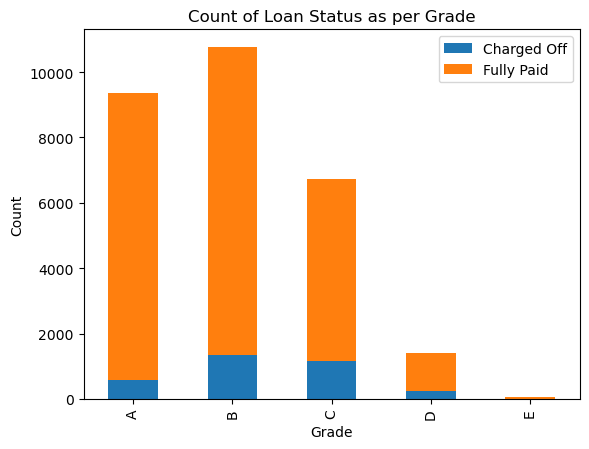

In [865]:
pt3.plot(kind='bar', stacked=True)
plt.ylabel("Count")
plt.xlabel("Grade")
plt.legend(['Charged Off', 'Fully Paid'])
plt.title("Count of Loan Status as per Grade")

In [866]:
temp = ratio_per(pt3, gra_uni, 'monthly_inc', loa_sta_uni)

for i in temp:
    print(i)
    print(f"Charged Off : {temp[i]}%, Fully Paid : {100-temp[i]}%")
    print()

B
Charged Off : 12.57%, Fully Paid : 87.43%

C
Charged Off : 17.29%, Fully Paid : 82.71000000000001%

A
Charged Off : 6.23%, Fully Paid : 93.77%

D
Charged Off : 18.36%, Fully Paid : 81.64%

E
Charged Off : 21.57%, Fully Paid : 78.43%



<b>Here we can see that, around 17.29% customers who were "C grade" had Charged Off</b><br><br>
<b>Here we can see that, around 18.36% customers who were "D grade" had Charged Off</b><br><br>
<b>Here we can see that, around 21.57% customers who were "E grade" had Charged Off</b>

### Home Ownership

In [867]:
pt4 = pd.pivot_table(data=data[['monthly_inc', 'home_ownership', 'loan_status']], index='home_ownership', columns='loan_status', aggfunc='count')


Text(0.5, 1.0, 'Count of Loan Status as per Home Ownership')

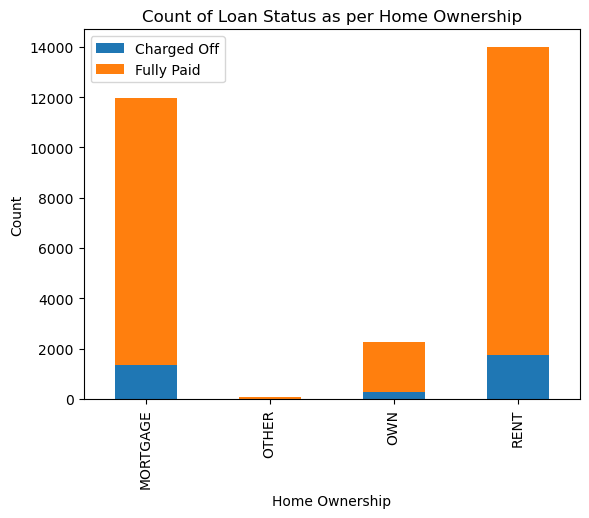

In [868]:
pt4.plot(kind='bar', stacked=True)
plt.ylabel("Count")
plt.xlabel("Home Ownership")
plt.legend(['Charged Off', 'Fully Paid'])
plt.title("Count of Loan Status as per Home Ownership")

In [871]:
temp = ratio_per(pt4, hom_own_uni, 'monthly_inc', loa_sta_uni)

for i in temp:
    print(i)
    print(f"Charged Off : {temp[i]}%, Fully Paid : {100-temp[i]}%")
    print()

RENT
Charged Off : 12.47%, Fully Paid : 87.53%

OWN
Charged Off : 12.18%, Fully Paid : 87.82%

MORTGAGE
Charged Off : 11.17%, Fully Paid : 88.83%

OTHER
Charged Off : 13.89%, Fully Paid : 86.11%



<b>Here we can see that, around 13.89% customers whose home ownership is not known which is "Other" had Charged Off</b><br><br>

## Observations from Bivariate analysis

1. If the customer has 1 or less than 1 year working experience then it is morelikely that he will default.
2. If the customer has LC grade of 'C', 'D', 'E'. are more likely to default.
3. If the customers home ownership is not clear, so he is morelikely to default.

# Multivariate Analysis

## Monthly Income vs Verification Status

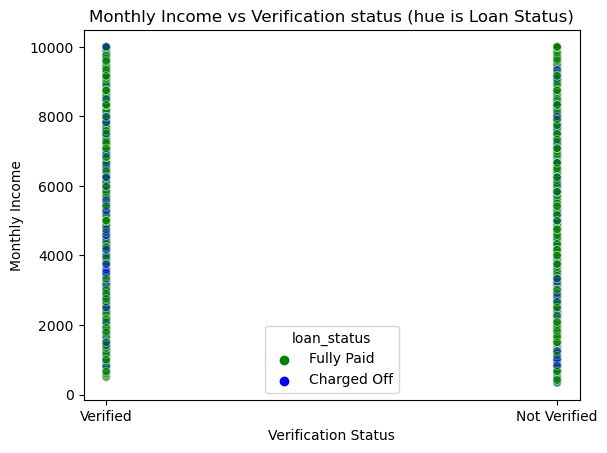

In [880]:
sns.scatterplot(data=data, y='monthly_inc', x='verification_status', hue='loan_status', palette=['green', 'blue'], alpha=0.4)
plt.ylabel("Monthly Income")
plt.xlabel("Verification Status")
plt.title("Monthly Income vs Verification status (hue is Loan Status)")
plt.show()


<b>Not much difference</b>

## Monthly Income vs Grade

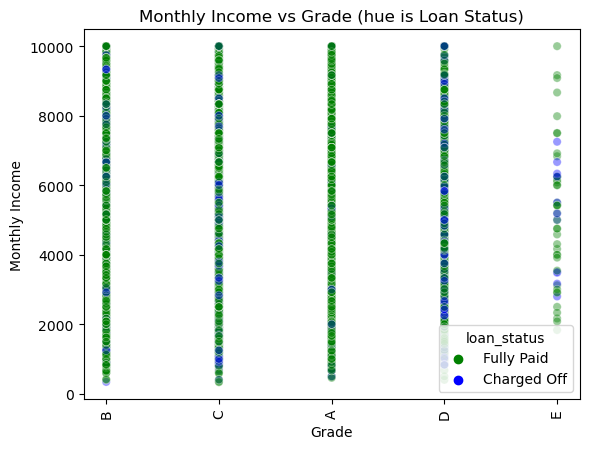

In [918]:
sns.scatterplot(data=data, y='monthly_inc', x='grade', hue='loan_status', palette=['green', 'blue'], alpha=0.4)
plt.ylabel("Monthly Income")
plt.xlabel("Grade")
plt.title("Monthly Income vs Grade (hue is Loan Status)")
plt.xticks(rotation=90)
plt.show()


## Installment vs Grade

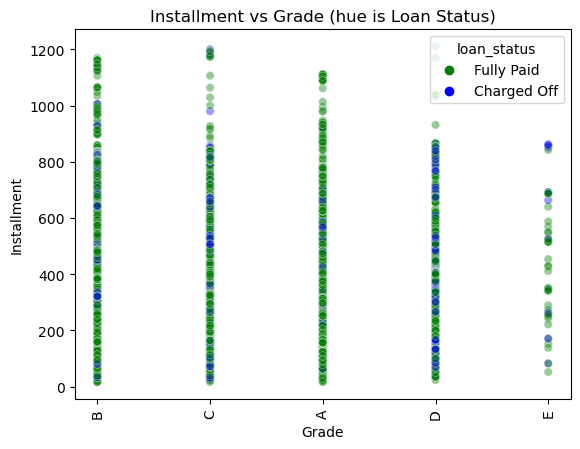

In [915]:
sns.scatterplot(data=data, y='installment', x='grade', hue='loan_status', palette=['green', 'blue'], alpha=0.4)
plt.ylabel("Installment")
plt.xlabel("Grade")
plt.title("Installment vs Grade (hue is Loan Status)")
plt.xticks(rotation=90)
plt.show()


<b>It is very clear that the 'C', 'D', 'E' or greater then there properties are not good to lend money</b>

## Monthly Income vs Home Ownership

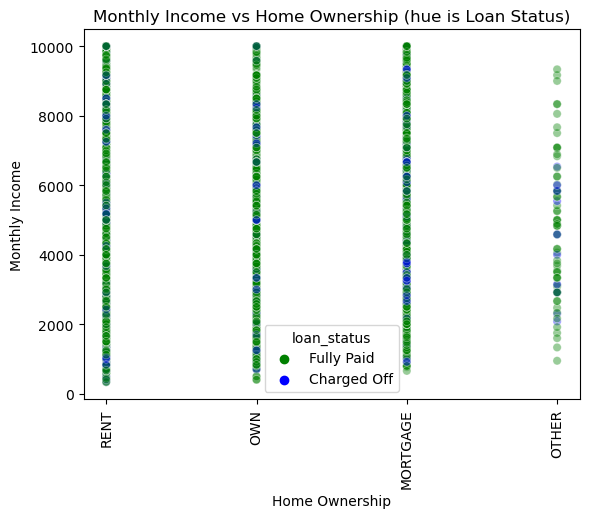

In [917]:
sns.scatterplot(data=data, y='monthly_inc', x='home_ownership', hue='loan_status', palette=['green', 'blue'], alpha=0.4)
plt.ylabel("Monthly Income")
plt.xlabel("Home Ownership")
plt.title("Monthly Income vs Home Ownership (hue is Loan Status)")
plt.xticks(rotation=90)
plt.show()


## Installment vs Home Ownership

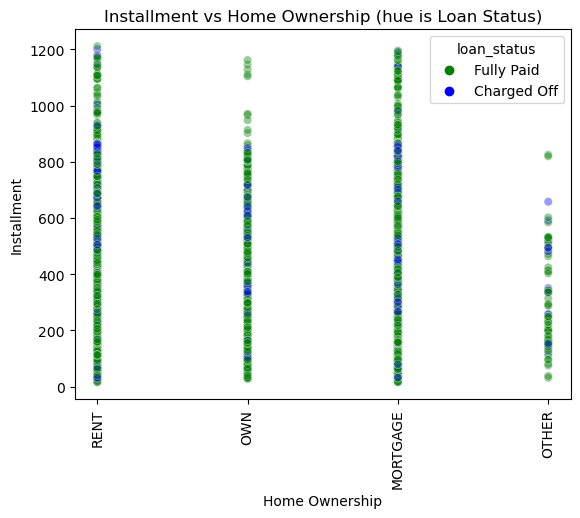

In [914]:
sns.scatterplot(data=data, y='installment', x='home_ownership', hue='loan_status', palette=['green', 'blue'], alpha=0.4)
plt.ylabel("Installment")
plt.xlabel("Home Ownership")
plt.title("Installment vs Home Ownership (hue is Loan Status)")
plt.xticks(rotation=90)
plt.show()


<b>It is very clear that the 'Mortgage' and 'Other' Home ownership categories are not so well in paying loans</b>

## Installment vs Monthly Income

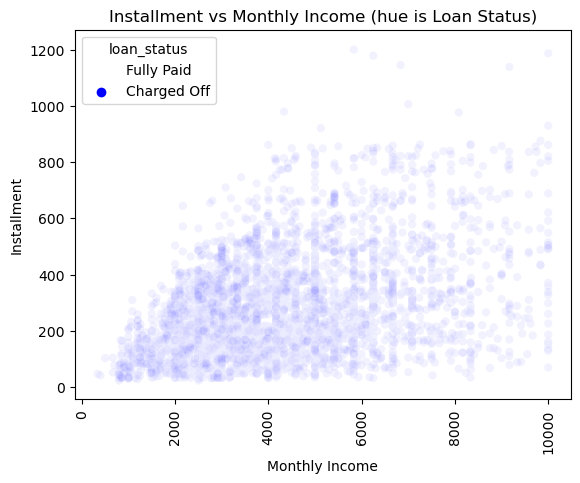

In [908]:
sns.scatterplot(data=data, y='installment', x='monthly_inc', hue='loan_status', palette=['white', 'blue'], alpha=0.05)
plt.ylabel("Installment")
plt.xlabel("Monthly Income")
plt.title("Installment vs Monthly Income (hue is Loan Status)")
plt.xticks(rotation=90)
plt.show()


## Monthly Income vs Interest Rate

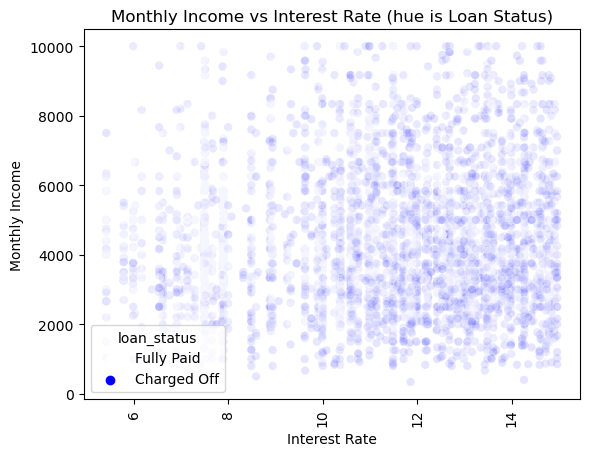

In [906]:
sns.scatterplot(data=data, y='monthly_inc', x='int_rate', hue='loan_status', palette=['white', 'blue'], alpha=0.1)
plt.ylabel("Monthly Income")
plt.xlabel("Interest Rate")
plt.title("Monthly Income vs Interest Rate (hue is Loan Status)")
plt.xticks(rotation=90)
plt.show()


## Monthly Income vs Loan Amount

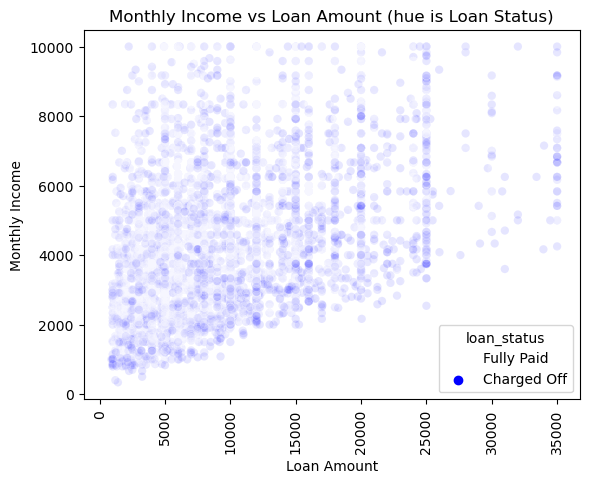

In [907]:
sns.scatterplot(data=data, y='monthly_inc', x='loan_amnt', hue='loan_status', palette=['white', 'blue'], alpha=0.1)
plt.ylabel("Monthly Income")
plt.xlabel("Loan Amount")
plt.title("Monthly Income vs Loan Amount (hue is Loan Status)")
plt.xticks(rotation=90)
plt.show()


## Loan Amount vs Interest Rate

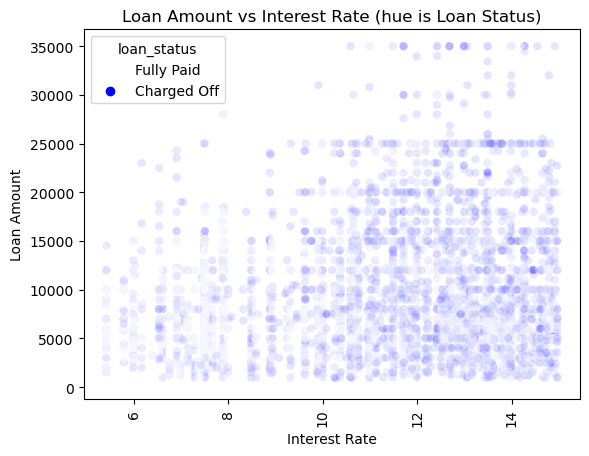

In [904]:
sns.scatterplot(data=data, y='loan_amnt', x='int_rate', hue='loan_status', palette=['white', 'blue'], alpha=0.1)
plt.ylabel("Loan Amount")
plt.xlabel("Interest Rate")
plt.title("Loan Amount vs Interest Rate (hue is Loan Status)")
plt.xticks(rotation=90)
plt.show()


<b>Major co-relations are seen in Interest Rate and monthly income and installments.</b><br>
<b>It shown that, more the interest rate: more the chances of default.</b>

## Co-Relation Metrics

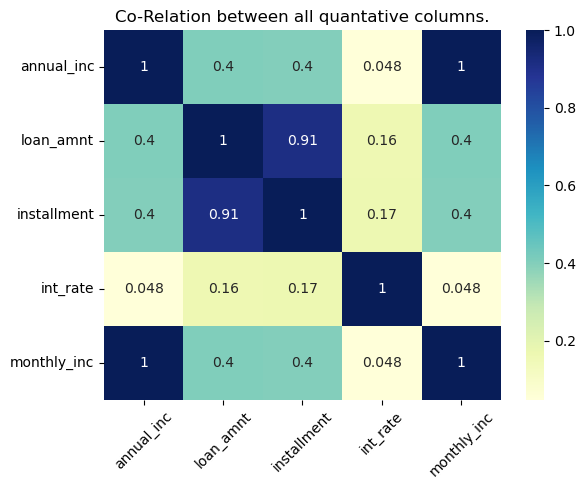

In [936]:
tempdata = data[data.loan_status == 'Charged Off']
sns.heatmap(tempdata.corr(), cmap="YlGnBu", annot=True)
plt.title("Co-Relation between all quantative columns.")
plt.xticks(rotation=45)
plt.show()

In [923]:
pvt = pd.pivot_table(data=data, index="loan_status", values=['monthly_inc', 'loan_amnt', 'installment', 'int_rate'])
pvt.head()

,installment,int_rate,loan_amnt,monthly_inc
loan_status,,,,
Charged Off,286.273884,11.552847,10128.206651,4338.457509
Fully Paid,287.382516,10.390714,9642.551442,4873.484516


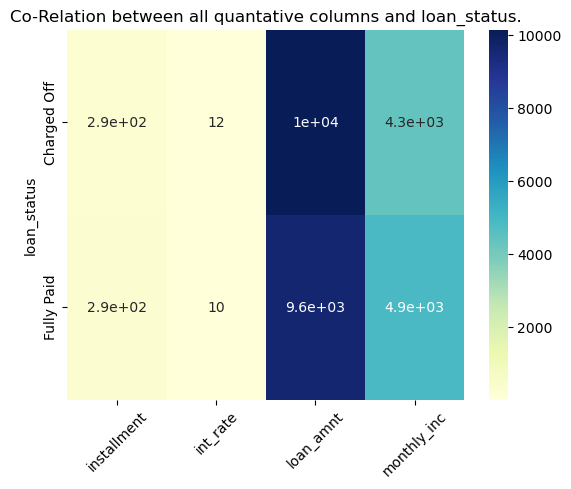

In [937]:
sns.heatmap(pvt, cmap="YlGnBu", annot=True)
plt.title("Co-Relation between all quantative columns and loan_status.")
plt.xticks(rotation=45)
plt.show()

## Observations from Multivariate analysis

1. It can be clearly seen here that lesser the monthly income, it is more likely be charged off.
2. And more the loan, more the chances of getting charged off if the monthly income is less than 8000 and loan amount shares good co relation with each other which is shown in the above co-relation map.